In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
from IPython.display import HTML, Image
from matplotlib import rc
# import matplotlib.rc as rc


rc('animation', html='html5')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data Source
- https://www.boi.org.il/he/DataAndStatistics/Lists/BoiTablesAndGraphs/heb_g04.xls
- https://www.boi.org.il/he/DataAndStatistics/Lists/BoiTablesAndGraphs/e_8.xls
- https://www.mako.co.il/news-money/2020_q2/Article-210b272dcd43171027.htm

In [3]:
def read_data():
    df = pd.read_csv('data/data.csv').sort_values(by='year').set_index('year')
    df['year'] = df.index
    df = df[[df.columns[-1], *df.columns[:-1]]]
    return df

def animation_df():
    def interpolate_2020(df):
        new_year = np.concatenate((np.linspace(2020., df.index.max(), 50,), np.linspace(2020.3001, 2020.305, 20)))
        year_2019_unemployed = df.unemployed_k.loc[2019]
        new_unemployed_k = np.concatenate((np.linspace(year_2019_unemployed, df.unemployed_k.loc[2020.3], 50,), np.linspace(df.unemployed_k.loc[2020.3], df.unemployed_k.loc[2020.3], 20,))) 
        year_2019_percentage = df.percent.loc[2019]
        new_percentage = np.concatenate((np.linspace(year_2019_percentage, df.percent.loc[2020.3], 50,), np.linspace(df.percent.loc[2020.3], df.percent.loc[2020.3], 20,))) 
        return pd.DataFrame(list(zip(new_year, new_unemployed_k, new_percentage)), index=new_year, columns=df.columns)
    df = read_data()
    interpolated = interpolate_2020(df)
    return pd.concat([df.iloc[:-1], interpolated])

df = animation_df()

In [4]:
df.tail()

,year,unemployed_k,percent
2020.303968,2020.303968,1004.316,24.99
2020.304226,2020.304226,1004.316,24.99
2020.304484,2020.304484,1004.316,24.99
2020.304742,2020.304742,1004.316,24.99
2020.305000,2020.305000,1004.316,24.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 124 entries, 1969.0 to 2020.305
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          124 non-null    float64
 1   unemployed_k  124 non-null    float64
 2   percent       124 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB


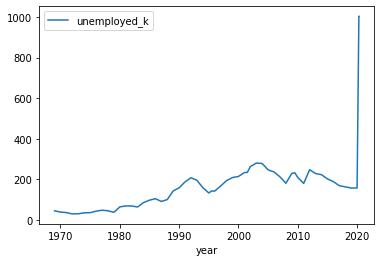

In [6]:
df.plot(x='year', y='unemployed_k')

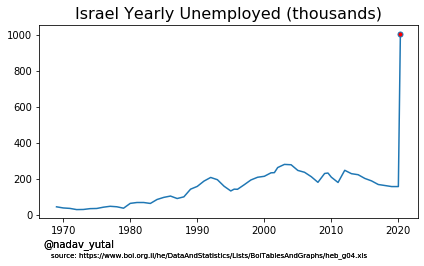

In [7]:
import time
first_index=1
frames = [df[['year', 'unemployed_k']].iloc[:i].to_numpy() for i in range(first_index, df.shape[0] + 1)]

fig, ax = plt.subplots()


def init():
    plt.annotate('@nadav_yutal', (0.01, -0.15), xycoords='axes fraction')
    plt.annotate('source: https://www.boi.org.il/he/DataAndStatistics/Lists/BoiTablesAndGraphs/heb_g04.xls', 
                 (0.03, -0.2), xycoords='axes fraction', fontsize=7)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    ax.set_title('Israel Yearly Unemployed (thousands)', fontsize=16)
    line, = ax.plot(frames[0][:,0], frames[0][:,1])
    return line,

def update(frame):
    ax.cla()
    plt.annotate('@nadav_yutal', (0.01, -0.15), xycoords='axes fraction')
    plt.annotate('source: https://www.boi.org.il/he/DataAndStatistics/Lists/BoiTablesAndGraphs/heb_g04.xls', 
                 (0.03, -0.2), xycoords='axes fraction', fontsize=7)

#     ax.set_title(f'year={int(frame[-1,0])}')
    ax.set_title('Israel Yearly Unemployed (thousands)', fontsize=16)
#     ax.text(1990, 50, '@nadav_yutal')
    markers_on = [-1]
    line, = ax.plot(frame[:,0], frame[:,1], markevery=markers_on, marker='o', markerfacecolor='red', markersize=5)
    return line,

ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=False)

ani.save('output/israel_unemployed.gif',  writer='imagemagick', fps=5,)
ani